<a href="https://colab.research.google.com/github/mandeebot/Predictive-Maintainance/blob/main/renewable_en.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We Start of our analysis by importing the libraries we would use

In [2]:
import pandas as pd
import numpy as np
import pickle


In [3]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

# Classifier Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (AdaBoostClassifier,GradientBoostingClassifier)

#Evaluation and cross validation Libraries
from sklearn.model_selection import cross_val_predict
from sklearn import tree
import sklearn.metrics as metrics
from sklearn.feature_selection import SelectKBest, chi2

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer
    )

LOADING DATA

In [4]:
train_data = pd.read_csv('/content/drive/MyDrive/renewable energy proj (1)/Train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/renewable energy proj (1)/Test.csv')

EDA AND INSIGHTS

In [5]:
train_data.head()
#test_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.464606,-4.679129,3.101546,0.506130,-0.221083,-2.032511,-2.910870,0.050714,-1.522351,3.761892,-5.714719,0.735893,0.981251,1.417884,-3.375815,-3.047303,0.306194,2.914097,2.269979,4.394876,-2.388299,0.646388,-1.190508,3.132986,0.665277,-2.510846,-0.036744,0.726218,-3.982187,-1.072638,1.667098,3.059700,-1.690440,2.846296,2.235198,6.667486,0.443809,-2.369169,2.950578,-3.480324,0
1,-2.909996,-2.568662,4.109032,1.316672,-1.620594,-3.827212,-1.616970,0.669006,0.387045,0.853814,-6.352826,4.271718,3.162020,0.257559,-3.547127,-4.284533,2.897271,1.508313,3.667963,7.123824,-4.095749,1.015082,-0.969790,-0.968207,2.063871,-1.646110,0.426956,0.734860,-4.470201,-2.771871,-2.504884,-3.782686,-6.823172,4.908562,0.481554,5.338051,2.381297,-3.127756,3.527309,-3.019581,0
2,4.283674,5.105381,6.092238,2.639922,-1.041357,1.308419,-1.876140,-9.582412,3.469504,0.763395,-2.573231,-3.349664,-0.594666,-5.246841,-4.309957,-16.232431,-0.999690,2.318208,5.941888,-3.857972,-11.599497,4.021252,-6.281194,4.633167,0.930157,6.280225,0.850654,0.268846,-2.206445,-1.328828,-2.398515,-3.097934,2.690334,-1.643048,7.566482,-3.197647,-3.495672,8.104779,0.562085,-4.227426,0
3,3.365912,3.653381,0.909671,-1.367528,0.332016,2.358938,0.732600,-4.332135,0.565695,-0.101080,1.914465,-0.951458,-1.255259,-2.706522,0.193223,-4.769379,-2.205319,0.907716,0.756894,-5.833678,-3.065122,1.596647,-1.757311,1.766444,-0.267098,3.625036,1.500346,-0.585712,0.783034,-0.201217,0.024883,-1.795474,3.032780,-2.467514,1.894599,-2.297780,-1.731048,5.908837,-0.386345,0.616242,0
4,-3.831843,-5.824444,0.634031,-2.418815,-1.773827,1.016824,-2.098941,-3.173204,-2.081860,5.392621,-0.770673,1.106718,1.144261,0.943301,-3.163804,-4.247825,-4.038909,3.688534,3.311196,1.059002,-2.143026,1.650120,-1.660592,1.679910,-0.450782,-4.550695,3.738779,1.134404,-2.033531,0.840839,-1.600395,-0.257101,0.803550,4.086219,2.292138,5.360850,0.351993,2.940021,3.839160,-4.309402,0


In [6]:
train_data.info()
#test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      39954 non-null  float64
 1   V2      39961 non-null  float64
 2   V3      40000 non-null  float64
 3   V4      40000 non-null  float64
 4   V5      40000 non-null  float64
 5   V6      40000 non-null  float64
 6   V7      40000 non-null  float64
 7   V8      40000 non-null  float64
 8   V9      40000 non-null  float64
 9   V10     40000 non-null  float64
 10  V11     40000 non-null  float64
 11  V12     40000 non-null  float64
 12  V13     40000 non-null  float64
 13  V14     40000 non-null  float64
 14  V15     40000 non-null  float64
 15  V16     40000 non-null  float64
 16  V17     40000 non-null  float64
 17  V18     40000 non-null  float64
 18  V19     40000 non-null  float64
 19  V20     40000 non-null  float64
 20  V21     40000 non-null  float64
 21  V22     40000 non-null  float64
 22

In [7]:
train_data.describe().T
#test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,39954.0,-0.288120,3.449072,-13.501880,-2.751460,-0.773518,1.836708,17.436981
V2,39961.0,0.442672,3.139431,-13.212051,-1.638355,0.463939,2.537508,13.089269
V3,40000.0,2.505514,3.406263,-11.469369,0.202682,2.265319,4.584920,18.366477
V4,40000.0,-0.066078,3.437330,-16.015417,-2.349574,-0.123691,2.148596,13.279712
V5,40000.0,-0.044574,2.107183,-8.612973,-1.507206,-0.096824,1.346224,9.403469
V6,40000.0,-1.000849,2.036756,-10.227147,-2.363446,-1.006635,0.373909,7.065470
V7,40000.0,-0.892793,1.756510,-8.205806,-2.036913,-0.934738,0.206820,8.006091
V8,40000.0,-0.563123,3.298916,-15.657561,-2.660415,-0.384188,1.714383,11.679495
V9,40000.0,-0.007739,2.161833,-8.596313,-1.493676,-0.052085,1.425713,8.507138
V10,40000.0,-0.001848,2.183034,-11.000790,-1.390549,0.105779,1.486105,8.108472


In [8]:
#checking for data duplicates
train_data.duplicated().sum()
#test_data.duplicated().sum()


0

In [9]:
#checking for empty data points
train_data.isnull().sum().head()
#test_data.isnull().sum()

V1    46
V2    39
V3     0
V4     0
V5     0
dtype: int64

In [10]:
#importing major visualization libraries
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns

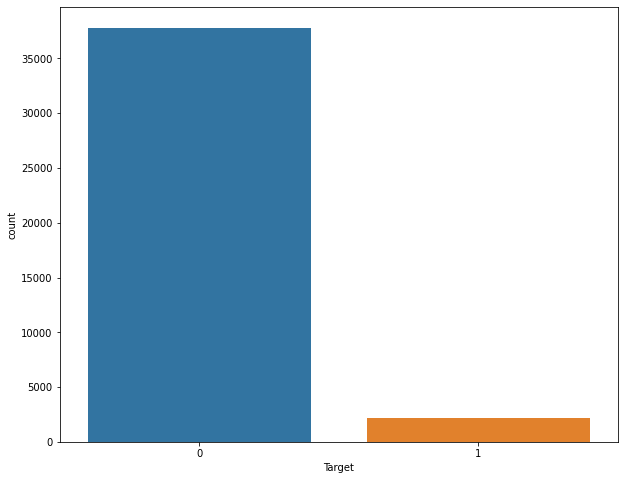

In [11]:
#visualizing the target variable
plt.figure(figsize=(10,8))
sns.countplot(x='Target', data=train_data)

In [12]:
print('No Failure', round(train_data['Target'].value_counts()[0]/len(train_data) * 100,2), '% of the dataset')
print('Failure', round(train_data['Target'].value_counts()[1]/len(train_data) * 100,2), '% of the dataset')

No Failure 94.53 % of the dataset
Failure 5.47 % of the dataset


**Observations**
- from visualizing the target variable, we see that we have an imbalanced data set,  thus we will have to figure out ways to implement to balance the set, so as to obtain valuable results from our classification models


DATA PREPROCESSING

In [13]:
#Filling of missing data inputs with the feature mean
train_data['V1'] = train_data['V1'].fillna(value=-0.288120)
test_data['V1'] = test_data['V1'].fillna(value=-0.259840)
train_data['V2'] = train_data['V2'].fillna(value=0.442672	)
test_data['V2'] = test_data['V2'].fillna(value=0.416733	)


In [14]:
#seperating the data feature from the target label, to allow for easier analysisi and model building
x = train_data.drop(columns=['Target'], axis=1)
y = train_data['Target']
test_data = test_data.drop(columns=['Target'])

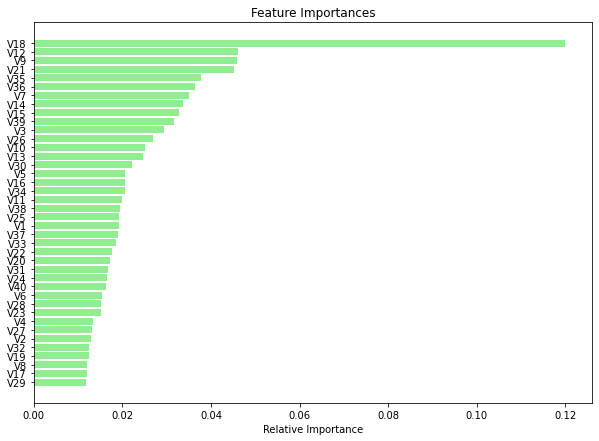

In [15]:
#plotting a feature importance chart
from sklearn.ensemble import RandomForestClassifier
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(x,y)

model = RandomForestClassifier()
# fit the model
model.fit(df_scaled, y)
feature_names = list(x.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 7))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color='lightgreen', align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

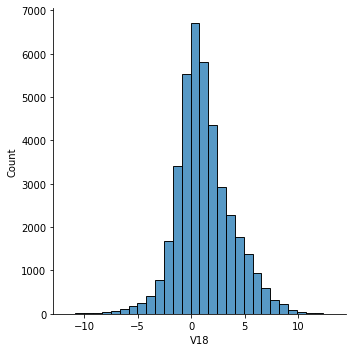

In [16]:
sns.displot(x='V18',bins=30,data=x)

*** observation**
V18 feature seems to be the most important feature in determing generator failure, quite an interesting finding.

### MODEL BUILDING 
** we will be building six(6) classifier models, namely;**
- Random Foest Ensemble,
- GradientBoost classifier

First we import the pipeline helper package using pip install command, and we begine to import the libraires needed to build our different classifiers

In [17]:
pip install pipelinehelper

**Next we create two functions to calculate different metrics and confusion matrix, so that we don't have to use the same code repeatedly for each model.**

In [18]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    TP = confusion_matrix(target, model.predict(predictors))[1, 1]
    FP = confusion_matrix(target, model.predict(predictors))[0, 1]
    FN = confusion_matrix(target, model.predict(predictors))[1, 0]
    Cost = TP * 15 + FP * 5 + FN * 40  # maintenance cost by using model
    Min_Cost = (TP + FN) * 15  # minimum possible maintenance cost = number of actual positives
    Percent = Min_Cost / Cost  # ratio of minimum possible maintenance cost and maintenance cost by model

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
            "Minimum_Vs_Model_cost": Percent,
        },
        index=[0],
    )

    return df_perf

In [19]:
# defining metric to be used for optimization and with cross-validation
def Minimum_Vs_Model_cost(y_train, y_pred):
    """
    We want the model to optimize the maintenance cost and reduce it to the lowest possible value.
    The lowest possible maintenance cost will be achieved when each sample is predicted correctly.

    In such a scenario, the maintenance cost will be the total number of failures times the maintenance cost of replacing one generator,
    which is given by (TP + FN) * 40 (i.e., the actual positives*40).
    For any other scenario,
    the maintenance cost associated with the model will be given by (TP * 15 + FP * 5 + FN * 40).

    We will use the ratio of these two maintenance costs as the cost function for our model.
    The greater the ratio, the lower the associated maintenance cost and the better the model.
    """
    TP = confusion_matrix(y_train, y_pred)[1, 1]
    FP = confusion_matrix(y_train, y_pred)[0, 1]
    FN = confusion_matrix(y_train, y_pred)[1, 0]
    return ((TP + FN) * 15) / (TP * 15 + FP * 5 + FN * 40)


# A value of .80 here, will represent that the minimum maintenance cost is 80% of the maintenance cost associated with the model.
# Since minimum maintenance cost is constant for any data, when minimum cost will become 100% of maintenance cost associated with the model
# Model will have give the least possible maintenance cost.


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(Minimum_Vs_Model_cost, greater_is_better=True)

# Higher the values, the lower the maintenance cost

In [20]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [21]:
# Splitting data in train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

### OVER SAMPLE SMOTE DATA ###
*** in this preceding section, we will train and build the classifiers on an oversampled data set**
- the data set is oversampled using smote, which balances the uneven data sets by creating synthetic data instances of the minority group. 

In [22]:
# importing smote froom the imblearn library
from imblearn.over_sampling import SMOTE

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
x_smote, y_smote = sm.fit_resample(X_train, y_train)

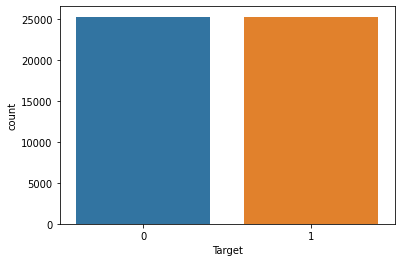

In [23]:
sns.countplot(x=y_smote,data=train_data)

In [24]:
y_smote.shape,x_smote.shape

((50638,), (50638, 40))

In [25]:
from pipelinehelper import PipelineHelper

### MODEL BUILDING 

---



In [26]:
# Construct some pipelines
pipe_rf = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', RandomForestClassifier()),
])

pipe_gb = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', GradientBoostingClassifier()),
])


# List of pipelines for ease of iteration
pipelines = [pipe_rf,pipe_gb]
			
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Random Forest', 1: 'GradientBoost'}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(X_train,y_train)

# Compare accuracies
for idx, val in enumerate(pipelines):
	print('%s pipeline test accuracy: %.3f' % (pipe_dict[idx], val.score(X_test, y_test)))

# Identify the most accurate model on test data
best_acc = 0.0
best_clf = 0
best_pipe = ''
for idx, val in enumerate(pipelines):
	if val.score(X_test, y_test) > best_acc:
		best_acc = val.score(X_test, y_test)
		best_pipe = val
		best_clf = idx
print('Classifier with best accuracy: %s' % pipe_dict[best_clf])


Random Forest pipeline test accuracy: 0.989
GradientBoost pipeline test accuracy: 0.984
Classifier with best accuracy: Random Forest


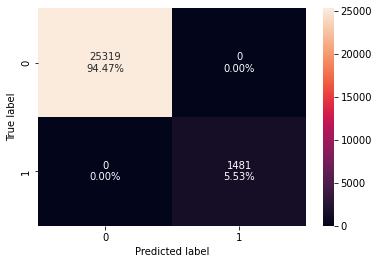

In [27]:
confusion_matrix_sklearn(pipe_rf,X_train,y_train)

In [28]:
Random_Forest_tune_perf_train = model_performance_classification_sklearn(
    pipe_rf, X_train, y_train
)
Random_Forest_tune_perf_train

,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,1.0,1.0,1.0,1.0,1.0


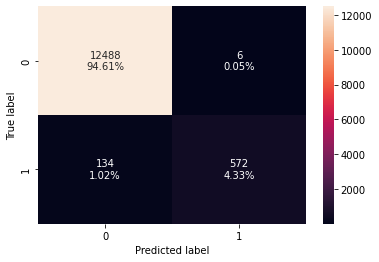

In [29]:
confusion_matrix_sklearn(pipe_rf,X_test,y_test)

In [30]:
Random_Forest_tune_perf_test = model_performance_classification_sklearn(
    pipe_rf, X_test, y_test
)
Random_Forest_tune_perf_test

,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.989394,0.810198,0.989619,0.890966,0.758053


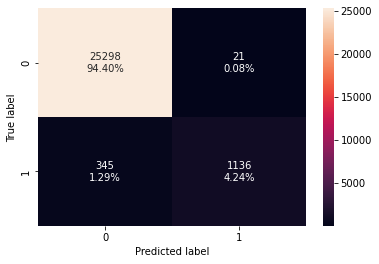

In [31]:
confusion_matrix_sklearn(pipe_gb,X_train,y_train)

In [32]:
Gradient_clf_perf_train = model_performance_classification_sklearn(
    pipe_gb, X_train, y_train
)
Gradient_clf_perf_train

,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.986343,0.767049,0.98185,0.861259,0.717887


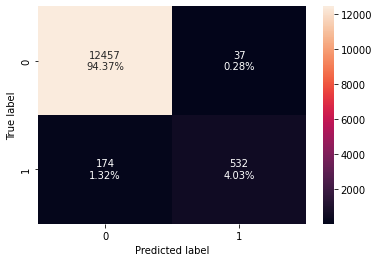

In [33]:
confusion_matrix_sklearn(pipe_gb,X_test,y_test)

In [34]:
Gradient_clf_perf_test = model_performance_classification_sklearn(
    pipe_gb, X_test, y_test
)
Gradient_clf_perf_test

,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.984015,0.753541,0.934974,0.83451,0.700165


In [35]:
#compares and presents the performances of all the models on a data frame
models_comp_df = pd.concat(
    [
        Random_Forest_tune_perf_train.T,
        Gradient_clf_perf_train.T,
    ],
    axis=1,
)
models_comp_df.columns = [
    "Random Forest",
    "GradientBoost"
]
print("Model Evaluation and data performance comparison:")
models_comp_df

Model Evaluation and data performance comparison:


,Random Forest,GradientBoost
Accuracy,1.0,0.986343
Recall,1.0,0.767049
Precision,1.0,0.981850
F1,1.0,0.861259
Minimum_Vs_Model_cost,1.0,0.717887


In [36]:
#compares and presents the performances of all the models on a data frame
models_comp_df2 = pd.concat(
    [
        Random_Forest_tune_perf_test.T,
        Gradient_clf_perf_test.T,
    ],
    axis=1,
)
models_comp_df2.columns = [
    "Random Forest",
    "GradientBoost"
]
print("Model Evaluation and data performance comparison:")
models_comp_df2

Model Evaluation and data performance comparison:


,Random Forest,GradientBoost
Accuracy,0.989394,0.984015
Recall,0.810198,0.753541
Precision,0.989619,0.934974
F1,0.890966,0.834510
Minimum_Vs_Model_cost,0.758053,0.700165


### HYPERPARAMETER TUNNING ###
*** The 3 best performing Models in the preceding section will be tuned these three are selected because they performed well and had the better f1 score within the previosuly six trained model. they possesd the minium
- Random Forest Model
- GradientBoost Classifier

*** RANDOM FOREST HYPERPARAMTER TUNNING

In [37]:
#hperparameter tunning for the random forest classifier 
RF_pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', RandomForestClassifier()),
])
param_grid = {
    "clf__n_estimators": [150,250],
    "clf__min_samples_leaf": np.arange(1, 3),
    "clf__max_features": ['sqrt','log2'],
    "clf__max_samples": np.arange(0.2, 0.6, 0.1)}
grid_search_tune = GridSearchCV(RF_pipe, param_grid, cv=2, n_jobs=2, verbose=3)
grid_search_tune.fit(x_smote, y_smote)

print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps)

# measuring performance on test set
print ("Applying best classifier on test data:")
rf_best_clf = grid_search_tune.best_estimator_
predictions = rf_best_clf.predict(X_test)

Fitting 2 folds for each of 32 candidates, totalling 64 fits
Best parameters set:
[('scaler', MinMaxScaler()), ('clf', RandomForestClassifier(max_features='sqrt', max_samples=0.5000000000000001,
                       n_estimators=150))]
Applying best classifier on test data:


In [38]:
extracted_best = grid_search_tune.best_estimator_.steps[-1][1]

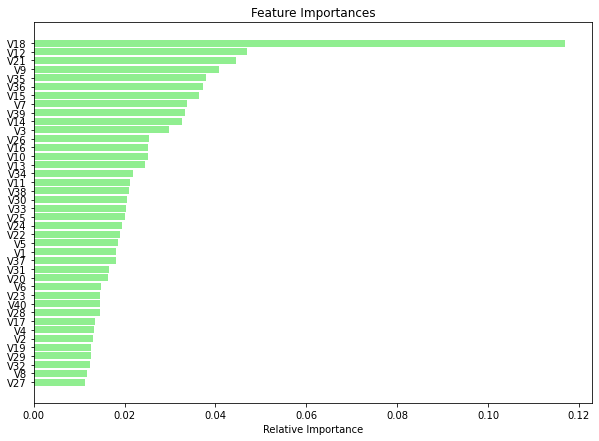

In [39]:
#to get the feature importance 
extracted_best.fit(df_scaled, y)
feature_names = list(x.columns)
importances = extracted_best.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 7))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color='lightgreen', align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

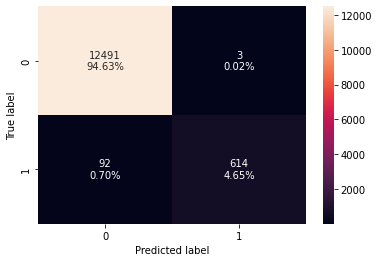

In [40]:
confusion_matrix_sklearn(rf_best_clf,X_test,y_test)

In [41]:
tunned_RF_clf_perf = model_performance_classification_sklearn(
    rf_best_clf, X_test, y_test
)
tunned_RF_clf_perf

,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.992803,0.869688,0.995138,0.928193,0.820612


*** GRADIENT BOOSTING HYPERPARAMETER TUNNING

In [42]:
#tunning  gradientboost model hyperparameters
GB_pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', GradientBoostingClassifier()),
])
param_grid = {
    "clf__init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "clf__n_estimators": np.arange(75,150,25),
    "clf__learning_rate": [0.2, 0.05, 1],
    "clf__subsample":[0.5,0.7],
    "clf__max_features":[0.5,0.7]}

grid_search_tune = GridSearchCV(
    GB_pipe, param_grid, cv=2, n_jobs=2, verbose=3)
grid_search_tune.fit(x_smote, y_smote)

print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps)

# measuring performance on test set
print("Applying best classifier on test data:")
gb_best_clf = grid_search_tune.best_estimator_
predictions = gb_best_clf.predict(X_test)

Fitting 2 folds for each of 72 candidates, totalling 144 fits
Best parameters set:
[('scaler', MinMaxScaler()), ('clf', GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=1, max_features=0.5, subsample=0.7))]
Applying best classifier on test data:


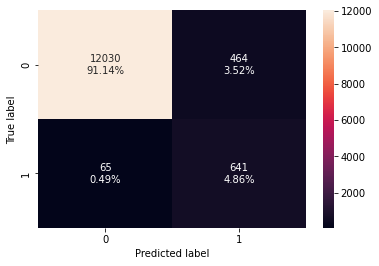

In [43]:
confusion_matrix_sklearn(gb_best_clf,X_test,y_test)

In [44]:
tunned_gradient_clf_perf = model_performance_classification_sklearn(
    gb_best_clf, X_test, y_test
)
tunned_gradient_clf_perf

,Accuracy,Recall,Precision,F1,Minimum_Vs_Model_cost
0,0.959924,0.907932,0.58009,0.707896,0.728586


In [45]:
#compares and presents the performances of all the models on a data frame(post-tunning)
tunned_models_comp_df = pd.concat(
    [
        tunned_RF_clf_perf.T,
        tunned_gradient_clf_perf.T,
    ],
    axis=1,
)
tunned_models_comp_df.columns = [
  
    "Random Forest",
    "GradientBoost"
]
print("Model Evaluationdata performance comparison:")
tunned_models_comp_df

Model Evaluationdata performance comparison:


,Random Forest,GradientBoost
Accuracy,0.992803,0.959924
Recall,0.869688,0.907932
Precision,0.995138,0.580090
F1,0.928193,0.707896
Minimum_Vs_Model_cost,0.820612,0.728586


### observation ###
 we can observe from the comaprism table above the performances of the two classifers used, and we can clearly see, that the Random forest classifer performed better than the other two, with an improved F1 score of 0.92, and a model accuracy score of 0.99, which means that we can trust in the models capability to give off accurate predictions of our target label. Than the Gradient Boost which has an f1 score of 0.70
- ** note **
we see an improved recall score, when compared with the models performance on the over sampled data set and an improved minimum vs model cost as well(0.82) which is greater than the 0.78 threshold.
- Thus, Random Forest Model is our model of choice to give off accurate and precise predictions in this classification problem.

PRODUCTIONIZING THE FINAL MODEL

we productionize our final model by testing it on the test data set, which has about 10,000 data observations, and has already been prepped and ready for our model. and getting it ready in a pipeline environment

In [46]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X, y = sm.fit_resample(x, y)

In [48]:
#Final Model
RF_pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', RandomForestClassifier()),
])
param_grid = {
    "clf__n_estimators": [150,250],
    "clf__min_samples_leaf": np.arange(1, 3),
    "clf__max_features": ['sqrt','log2'],
    "clf__max_samples": np.arange(0.2, 0.6, 0.1)}
grid_search_tune = GridSearchCV(RF_pipe, param_grid, cv=2, n_jobs=2, verbose=3)
grid_search_tune.fit(X, y)

print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps)

# measuring performance on test set
print("Applying best classifier on test data:")
rf_best_clf = grid_search_tune.best_estimator_
predictions = rf_best_clf.predict(test_data)

Fitting 2 folds for each of 32 candidates, totalling 64 fits
Best parameters set:
[('scaler', MinMaxScaler()), ('clf', RandomForestClassifier(max_features='sqrt', max_samples=0.5000000000000001,
                       n_estimators=250))]
Applying best classifier on test data:


In [49]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [50]:
# Serializing the best model for subsequent and easy usage
with open('pipe.pkl', 'wb') as file:
    pickle.dump(rf_best_clf, file)

MAINTAINANCE INSIGHTS AND CONCLUSION
- In conclusion, we have identified the most important feature 'V13', amongst other features that play a key role in early prediction of generator failure.
however the key recommendation here is for the compay to explore other predictive models that are ouside of the scope of the two models being used  models used in this project, for instances Deep learning etc to further explore other models that may perform considerably better than our adopted model